    > Country: Name of the country.
    > Region: Region the country belongs to.
    > Happiness Rank: Rank of the country based on the Happiness Score.
    > Happiness Score: A metric measured in 2015 by asking the sampled people the question: 
      "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
    > Standard Error: The standard error of the happiness score.
    > Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness Score.
    > Family: The extent to which Family contributes to the calculation of the Happiness Score
    > Health (Life Expectancy): The extent to which Life expectancy contributed to 
      the calculation of the Happiness Score
    > Freedom: The extent to which Freedom contributed to the calculation of the Happiness Score.
    > Trust (Government Corruption): The extent to which Perception of Corruption contributes to Happiness Score.
    > Generosity: The extent to which Generosity contributed to the calculation of the Happiness Score.
    > Dystopia Residual: The extent to which DR contributed to the calculation of the Happiness Score.
    > Lower Confidence Interval: Lower Confidence Interval of the Happiness Score
    > Upper Confidence Interval: Upper Confidence Interval of the Happiness Score

## Let's cleaning and preparing our data to get the real insight

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [158]:
data2015 = pd.read_csv('2015.csv')
data2016 = pd.read_csv('2016.csv')
data2017 = pd.read_csv('2017.csv')

In [159]:
data2015.columns = ['Country','Region','HappinessRank','HappinessScore', 'StandandardError','Economy','Family',
                    'Health','Freedom','Corruption','Generosity','DystopiaResidual']
data2016.columns = ['Country','Region','HappinessRank','HappinessScore','LowerConfidence','UpperConfidence', 'Economy','Family',
                    'Health','Freedom','Corruption','Generosity','DystopiaResidual']
data2017.columns = ['Country','HappinessRank','HappinessScore','WhiskerHigh','WhiskerLow','Economy','Family',
                    'Health','Freedom','Generosity','Corruption','DystopiaResidual']

## change data into categorical data

In [160]:
#Country #Region #HappinessRank
#converting into category

data2015.Country = data2015.Country.astype('category')
data2016.Country = data2016.Country.astype('category')
data2017.Country = data2017.Country.astype('category')

data2015.Region = data2015.Region.astype('category')
data2016.Region = data2016.Region.astype('category')

#HappinessRank jgn dibuat category. karna dia memiliki makna 1>unggul dibanding 2

country2015 = data2015.Country.cat.categories
country2016 = data2016.Country.cat.categories

region2015 = data2015.Region.cat.categories
region2016 = data2016.Region.cat.categories

#nb: cek tiap isi list ke tiap isi list lainnya
all(x in region2016 for x in region2015)
#data kategori region di data2015 semuanya juga terdapat di data2016. dan sebaliknya
region2015

Index(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America', 'Southeastern Asia',
       'Southern Asia', 'Sub-Saharan Africa', 'Western Europe'],
      dtype='object')

## check missing data

In [161]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country             158 non-null category
Region              158 non-null category
HappinessRank       158 non-null int64
HappinessScore      158 non-null float64
StandandardError    158 non-null float64
Economy             158 non-null float64
Family              158 non-null float64
Health              158 non-null float64
Freedom             158 non-null float64
Corruption          158 non-null float64
Generosity          158 non-null float64
DystopiaResidual    158 non-null float64
dtypes: category(2), float64(9), int64(1)
memory usage: 19.5 KB


In [162]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country             157 non-null category
Region              157 non-null category
HappinessRank       157 non-null int64
HappinessScore      157 non-null float64
LowerConfidence     157 non-null float64
UpperConfidence     157 non-null float64
Economy             157 non-null float64
Family              157 non-null float64
Health              157 non-null float64
Freedom             157 non-null float64
Corruption          157 non-null float64
Generosity          157 non-null float64
DystopiaResidual    157 non-null float64
dtypes: category(2), float64(10), int64(1)
memory usage: 20.6 KB


In [163]:
#nb: show the missing value by column
data2017[data2017.isnull().any(axis=1)]
#data2017[data2017.Region.isnull()] #specific column

,Country,HappinessRank,HappinessScore,WhiskerHigh,WhiskerLow,Economy,Family,Health,Freedom,Generosity,Corruption,DystopiaResidual


### Cool. there is no missing values

In [164]:
#nb: fungsi untuk mengurangi lists of string dg list of string juga
#newlistIsnt = [x for x in R2015Country if x not in R2016Country]

In [165]:
#nb: replace nilai nan/null
#data2016 = data2016.replace(np.nan, 'Unknown')
#df.column1 = df.column1.fillna('')
#df = df.fillna('')

## add 'Region'  to our data2017 with merging data2015 & data2016 into data2017

In [166]:
region2015 = data2015[['Country','Region']]
region2016 = data2016[['Country','Region']]
#nb: merging data
# how: left = data di left tulis semua
# right- data di right tulis semua
# inner - irisan
# outer - gabungan
data2017 = pd.merge(data2017, region2015, how='left', on='Country')
data2017 = data2017[['Country','Region','HappinessRank','HappinessScore','WhiskerHigh','WhiskerLow','Economy','Family',
            'Health','Freedom','Corruption','Generosity','DystopiaResidual']]
data2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 13 columns):
Country             155 non-null object
Region              149 non-null category
HappinessRank       155 non-null int64
HappinessScore      155 non-null float64
WhiskerHigh         155 non-null float64
WhiskerLow          155 non-null float64
Economy             155 non-null float64
Family              155 non-null float64
Health              155 non-null float64
Freedom             155 non-null float64
Corruption          155 non-null float64
Generosity          155 non-null float64
DystopiaResidual    155 non-null float64
dtypes: category(1), float64(10), int64(1), object(1)
memory usage: 16.3+ KB


In [167]:
#setelah di merge dg data 2015, data 2017 masih terdapat beberapa yg NaN
data2017[data2017.isnull().any(axis=1)]

,Country,Region,HappinessRank,HappinessScore,WhiskerHigh,WhiskerLow,Economy,Family,Health,Freedom,Corruption,Generosity,DystopiaResidual
32,Taiwan Province of China,NaN,33,6.422,6.494596,6.349404,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607
49,Belize,NaN,50,5.956,6.197242,5.714757,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956
70,"Hong Kong S.A.R., China",NaN,71,5.472,5.549594,5.394406,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633
92,Somalia,NaN,93,5.151,5.242484,5.059516,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,3.117485
110,Namibia,NaN,111,4.574,4.770355,4.377645,0.964434,1.098471,0.338612,0.520304,0.093147,0.077134,1.481890
146,South Sudan,NaN,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671,1.879567


In [168]:
# list2016Country = list(data2016['Country'])
# list2016Region = list(data2016['Region'])
# #nb:create a new dictionary from 2 list
# dict2016 = dict(zip(list2016Country, list2016Region))
# dict2016

In [169]:
#nb: completing your null values in datafarame with other dataframe
data2017['Region'] = data2017['Country'].map(data2016.set_index('Country')['Region']).fillna(data2017['Region'])

In [170]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 13 columns):
Country             155 non-null object
Region              153 non-null category
HappinessRank       155 non-null int64
HappinessScore      155 non-null float64
WhiskerHigh         155 non-null float64
WhiskerLow          155 non-null float64
Economy             155 non-null float64
Family              155 non-null float64
Health              155 non-null float64
Freedom             155 non-null float64
Corruption          155 non-null float64
Generosity          155 non-null float64
DystopiaResidual    155 non-null float64
dtypes: category(1), float64(10), int64(1), object(1)
memory usage: 16.3+ KB


In [171]:
#setelah data2017 yg bernilai NaN di ganti dg data2016, sekarang hanya terdapat 2 nilai NaN 
data2017[data2017.Region.isnull()]

,Country,Region,HappinessRank,HappinessScore,WhiskerHigh,WhiskerLow,Economy,Family,Health,Freedom,Corruption,Generosity,DystopiaResidual
32,Taiwan Province of China,NaN,33,6.422,6.494596,6.349404,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607
70,"Hong Kong S.A.R., China",NaN,71,5.472,5.549594,5.394406,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633


In [172]:
#cek pada data2017 yg nama countrynya mengandung kata 'china'
data2017[data2017['Country'].str.contains("China")]

,Country,Region,HappinessRank,HappinessScore,WhiskerHigh,WhiskerLow,Economy,Family,Health,Freedom,Corruption,Generosity,DystopiaResidual
32,Taiwan Province of China,NaN,33,6.422,6.494596,6.349404,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607
70,"Hong Kong S.A.R., China",NaN,71,5.472,5.549594,5.394406,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633
78,China,Eastern Asia,79,5.273,5.319278,5.226721,1.081166,1.160837,0.741416,0.472788,0.022794,0.028807,1.764939


In [173]:
#nb: dapat dicari tau nilai dari null tersebut adalah Eastern Asia.
#replace all NaN in Region with untuk se DF
#data2017 = data2017.replace(np.nan, 'Eastern Asia')

#replace NaN value with specific column
data2017['Region'] = data2017['Region'].fillna('Eastern Asia')
data2016.head(10)

,Country,Region,HappinessRank,HappinessScore,LowerConfidence,UpperConfidence,Economy,Family,Health,Freedom,Corruption,Generosity,DystopiaResidual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


# ANALYZING & VISUALIZATION

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
#data2016: LowerConfidence , UpperConfidence
#data2017: WhiskerHigh , WhiskerLow

   #### is generosity give an effect to DystopiaResidual?
    > generosity - DystopiaResidual
   #### is corruption give an impact yo Economy? 
    > corruption - economy
   
### 2016
   #### is aspect freedom from confident / economy?
    > freedom - confident 
    > freedom - economy
    
   #### is economy give an effect to get more confident?
    > confident - economy

### 2017
    > relation between (average of range of whisker) and (HappinessScore) - hue region
      gunanya range untuk apa?

#### is generosity give an effect to DystopiaResidual?
    > generosity - DystopiaResidual

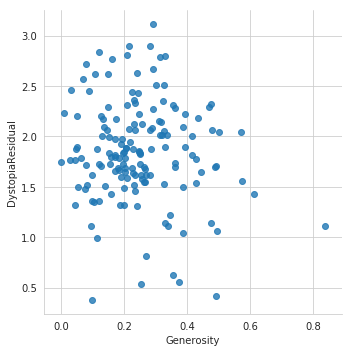

In [179]:
vis1 = sns.lmplot(data=data2017, x='Generosity', y='DystopiaResidual',
                 fit_reg = False)

   #### is corruption give an impact yo Economy? 
    > corruption - economy

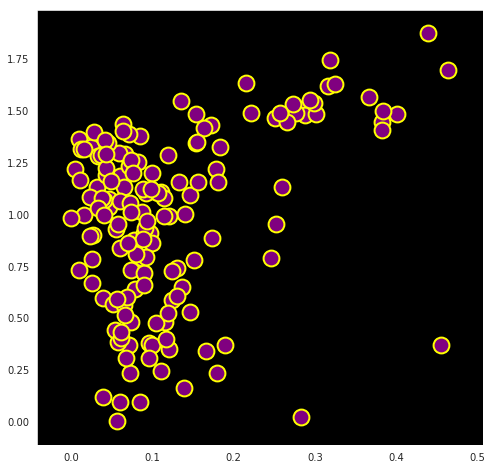

In [176]:
plt.rcParams['figure.figsize']=8,8
sns.set_style('dark',{"axes.facecolor":'black'})
kws = dict(s=250, linewidth = 2, edgecolor='yellow')
vis2 = plt.scatter(data2017.Corruption, data2017.Economy, c='purple', **kws )

   #### is aspect freedom from confident / economy?
    > freedom - confident 
    > freedom - economy

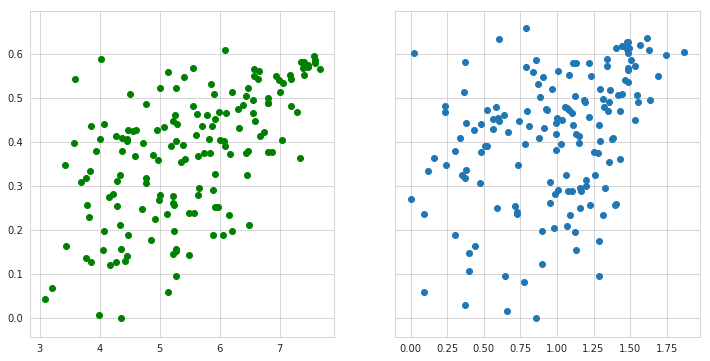

In [177]:
sns.set_style('whitegrid')
f, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)

visFC = axes[0].scatter(data=data2016, y='Freedom', x='UpperConfidence', color='green')
visFE = axes[1].scatter(data=data2017, y='Freedom', x='Economy')

#### is economy give an impact to get more confident?  confident - economy

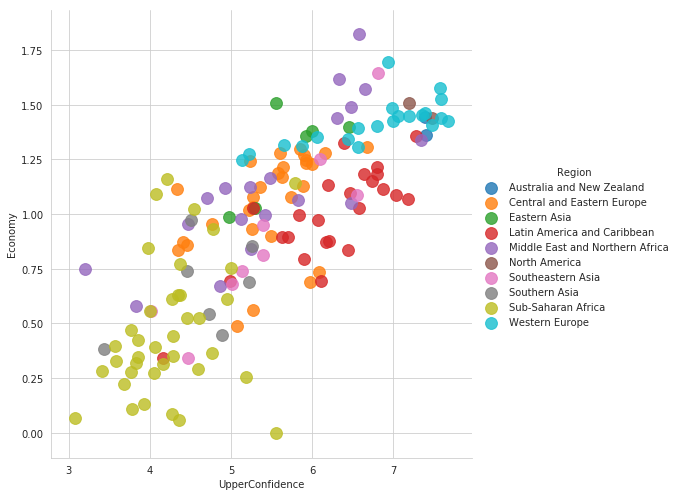

In [178]:
plt.rcParams['figure.figsize']
vis3 = sns.lmplot(data=data2016, x='UpperConfidence', y='Economy', 
                  hue='Region', size = 7, fit_reg=False, scatter_kws={'s':140})

### relation between whiskerHigh and HappinessScore 

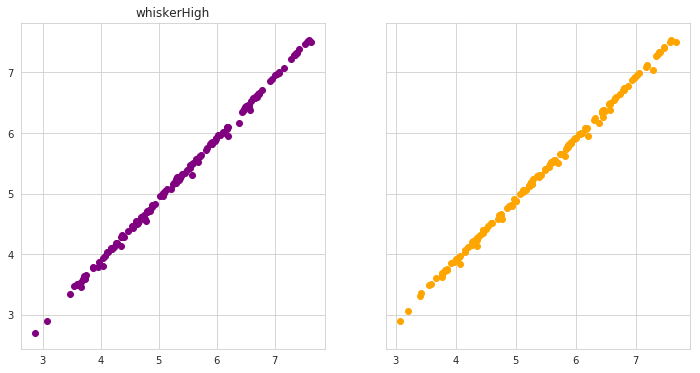

In [185]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)
vis4 = axes[0].scatter(data=data2017, x='WhiskerHigh', y='HappinessScore', color='purple')
axes[0].set_title('whiskerHigh')
vis5 = axes[1].scatter(data=data2016, x='UpperConfidence', y='HappinessScore', color='orange')

# BIVARIATE ANALYSIS - KORELASI
hubungan antara 2 variable

### numerik - numerik

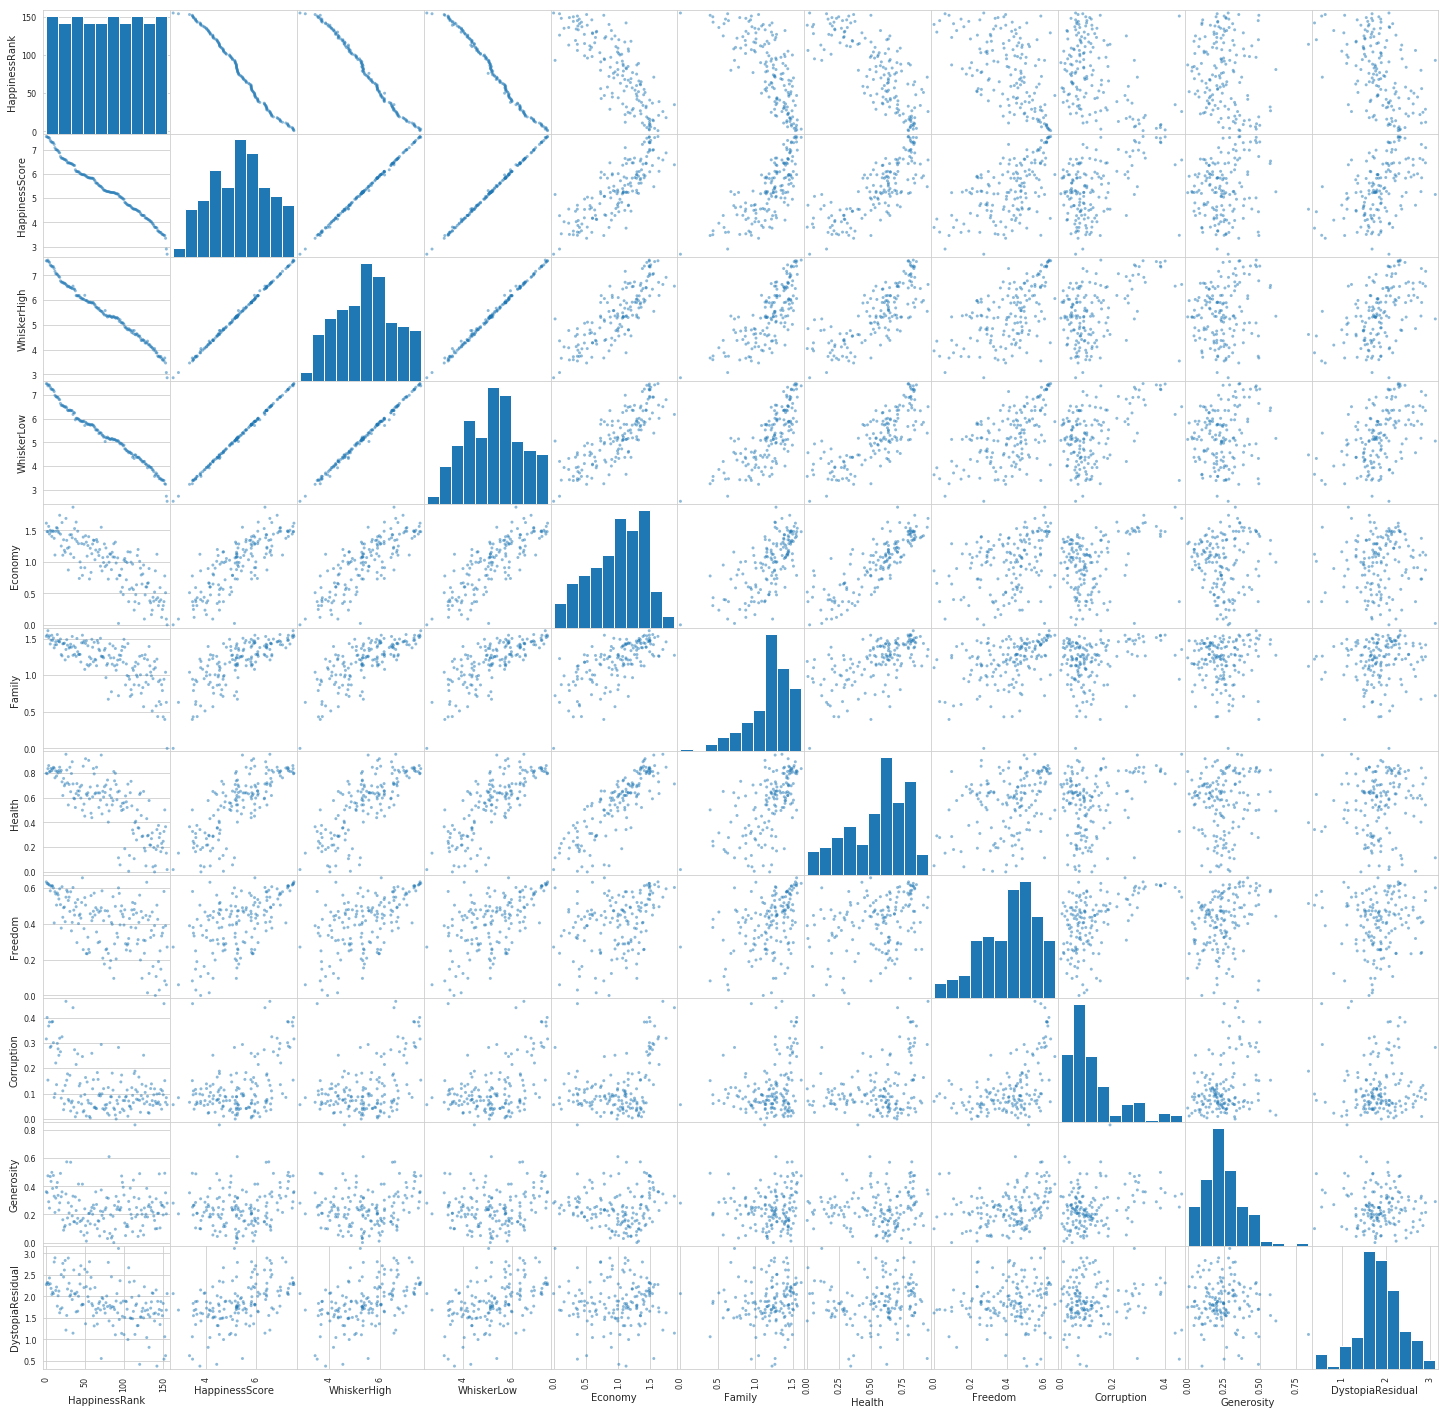

In [197]:
matrixCorr = pd.plotting.scatter_matrix(data2017, figsize=(25,25))

In [198]:
data2017.corr()

,HappinessRank,HappinessScore,WhiskerHigh,WhiskerLow,Economy,Family,Health,Freedom,Corruption,Generosity,DystopiaResidual
HappinessRank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.405842,-0.132620,-0.484506
HappinessScore,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.429080,0.155256,0.475355
WhiskerHigh,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.426459,0.155462,0.478824
WhiskerLow,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.431223,0.154904,0.471505
Economy,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,0.350944,-0.019011,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.231841,0.051693,0.070506
Health,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.279752,0.063191,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.499183,0.316083,0.081926
Corruption,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,1.000000,0.294159,-0.022755
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,0.294159,1.000000,-0.116627


## what we will learn further >0.75
    > WhiskerHigh - Economy (0.811868)
    > WhiskerHigh - Family  (0.750934)
    > whiskerHigh - Health  (0.776634)
    > Economy - Health      (0.843077)	
    > HappinessScore - 
      (WhiskerHigh/Economy/Family/Health
      (0.999497/0.812469/0.752737/0.781951)

In [214]:
data2017[data2017.Country=='Indonesia']

,Country,Region,HappinessRank,HappinessScore,WhiskerHigh,WhiskerLow,Economy,Family,Health,Freedom,Corruption,Generosity,DystopiaResidual
80,Indonesia,Southeastern Asia,81,5.262,5.352889,5.171112,0.995539,1.274445,0.492346,0.443323,0.015317,0.611705,1.429477


# REGRESI LINEAR (WhishkerHigh - HappinessScore)

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [208]:
## 1. SPLIT INTO INDEPENDENT & DEPENDENT
X = data2017.iloc[:,4:5] 
y = data2017.iloc[:,3:4]

## 2. SPLIT INTO TRAINING & TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0) 

In [209]:
# 3. CREATE OBJECT REGRESSION
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'HappinessScore')

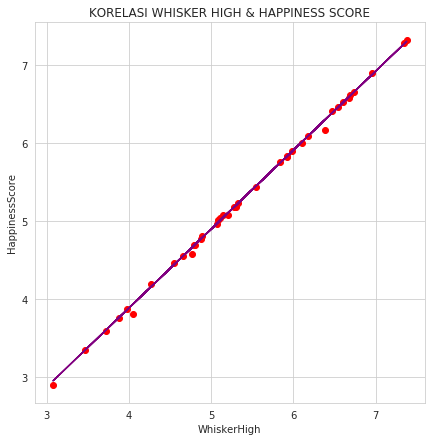

In [213]:
#PENGUJIAN DGN VISUALISASI
plt.rcParams['figure.figsize'] = 7,7
plt.scatter(X_test,y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color='purple')
plt.title('KORELASI WHISKER HIGH & HAPPINESS SCORE')
plt.xlabel('WhiskerHigh')
plt.ylabel('HappinessScore')

In [217]:
regressor.predict(np.array([[5]]))

array([[4.89906053]])

In [218]:
regressor.coef_

array([[1.00926431]])

In [219]:
regressor.intercept_

array([-0.14726102])

In [220]:
#jadi model training nya adalah:
# y = coef.X + intercept
# y = 1.X - 0.147